In [63]:
import pandas as pd
import numpy as np
import re

from functools import reduce

def format_title(title):
    title = title.replace('[FRESH] ', '') \
                 .replace('$', '') \
                 .replace('&amp;', '&') \
                 .lower()

    # Filter out anything in brackets
    return re.sub("[\ (\[].*?[\)\]]", "", title)

def flair_doesnt_contain_artist_and_title(flair):
    return not (re.search('artist', flair, re.IGNORECASE) and \
           re.search('title', flair, re.IGNORECASE))

def strip_out_featuring(song):
    return re.sub("[ft|FT|feat].([./])+$", "", song)


HHH = pd.read_csv("HHH.csv")
# Filter out unneeded columns
HHH = HHH[['title', 'score', 'link_flair_text', 'domain', 'author']]

# Format title
HHH['title'] = HHH['title'].apply(format_title)
HHH['score'] = HHH['score'].astype('int')

# Filter out all the songs that can't be split exactly in 2 using ' - '
HHH = HHH[(HHH['title'].str.split(' - ')).apply(len) == 2]

# Filter out all flairs with artist / title in (means the title is formatted incorrectly)
HHH = HHH[HHH['link_flair_text'].apply(flair_doesnt_contain_artist_and_title)]

# Split the title out into an artist & a song
HHH['artist'], HHH['song'] = zip(*HHH['title'].map(lambda x: \
                                                   x.split(' - ') or x))

# Sort by score
HHH = HHH.sort_values(['score'], ascending=[0])
# Get the first 30

x = HHH.head(20)

,title,score,link_flair_text,domain,author,artist,song
29,kendrick lamar - the heart part 4,18365,APRIL 7TH,itun.es,grafx97,kendrick lamar,the heart part 4
201,tyler the creator - who dat boy,15770,ft. A$AP ROCKY,youtube.com,MEECHISGOLF,tyler the creator,who dat boy
100,frank ocean - blonde,6221,BOYS DO CRY,itun.es,gr4tto,frank ocean,blonde
7,drake - more life now available on spotify,5685,Thread Locked—keep your shitposting in the gam...,open.spotify.com,kingfabs,drake,more life now available on spotify
157,chance the rapper & jeremih - merry christmas ...,5484,mixtape,soundcloud.com,dat_airshot,chance the rapper & jeremih,merry christmas lil mama
84,chance the rapper - coloring book,4713,MIRROR IN COMMENTS,itun.es,SoTheFliesDontCome,chance the rapper,coloring book
20,run the jewels - talk to me,4368,RTJ3 single,adultswim.com,imjameshall,run the jewels,talk to me
232,kanye west - wolves og cdq,3720,Kanye,audioclouds.net,soundflaw,kanye west,wolves og cdq
222,30 hours - kanye west,3717,Kanye West - 30 Hours,soundcloud.com,THIS_GUY4,30 hours,kanye west
151,schoolboy q - blank face lp,2944,LOCKED,self.hiphopheads,blazik,schoolboy q,blank face lp


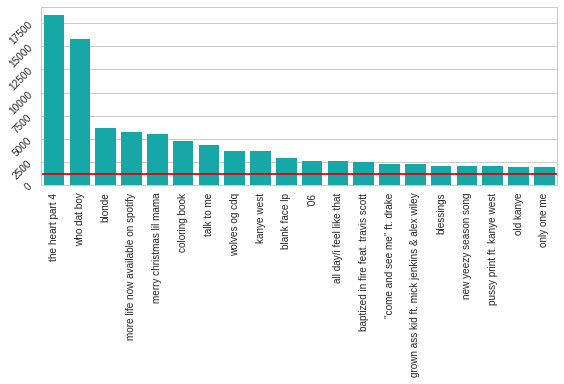

In [96]:
import seaborn as sns


sns.set_style("whitegrid")


g = sns.barplot(x="title", y="score", data={ "title": x['song'].apply(strip_out_featuring), "score": x['score'] },
                color="c")


def rotate_labels(g):
    for item in g.get_xticklabels():
        item.set_rotation(90)

    for item in g.get_yticklabels():
        item.set_rotation(45)

rotate_labels(g)

def draw_x_axis(g, mean):
    x_axis = sns.plt.gca().axes.get_xlim()
    g.plot(x_axis, len(x_axis) * [mean], sns.xkcd_rgb["red"])
    g.set(xlabel='', ylabel='')
    
draw_x_axis(g, HHH['score'].mean())
    

def show_and_save_as(filename):
    sns.plt.tight_layout()
    sns.plt.savefig(filename, format='pdf') 
    sns.plt.show()

show_and_save_as('songs.pdf')

In [70]:
x[:2]['score'].sum() / x['score'].sum()

0.36590202594061527

In [72]:
data = {
    "title": HHH["title"],
    "score": HHH["score"],
}

new_hhh = pd.DataFrame(data)

new_hhh['start'], new_hhh['end'] = zip(*new_hhh['title'].map(lambda x: x.split(' - ')))
# new_hhh['title'].str.split(' - ')

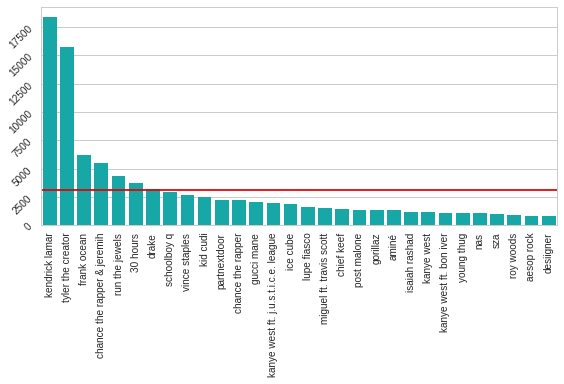

AttributeError: Cannot access callable attribute 'copy' of 'SeriesGroupBy' objects, try using the 'apply' method

In [103]:
#HHH.groupby(['artist']).agg(['count'])

artist_score = HHH.groupby(['artist'])['score'] #.median().sort_values(ascending=False).head(30)
artist_avg_score = artist_score.median().sort_values(ascending=False).head(30)

g = sns.barplot(x="artist", y="count", data={ "artist": artist_avg_score.keys(), "count": artist_avg_score.get_values() },
                 color="c")

rotate_labels(g)
draw_x_axis(g, artist_avg_score.get_values().mean())
show_and_save_as('artist-karma.pdf')

pd.melt(artist_score, "artist", var_name="a", value_name="c")


In [50]:
HHH

,title,score,link_flair_text,artist,song,count,counts
29,kendrick lamar - the heart part 4,18365,APRIL 7TH,kendrick lamar,the heart part 4,kendrick lamar,NaN
201,tyler the creator - who dat boy,15770,ft. A$AP ROCKY,tyler the creator,who dat boy,tyler the creator,NaN
100,frank ocean - blonde,6221,BOYS DO CRY,frank ocean,blonde,frank ocean,NaN
7,drake - more life now available on spotify,5685,Thread Locked—keep your shitposting in the gam...,drake,more life now available on spotify,drakedrakedrakedrake,NaN
157,chance the rapper & jeremih - merry christmas ...,5484,mixtape,chance the rapper & jeremih,merry christmas lil mama,chance the rapper & jeremih,NaN
84,chance the rapper - coloring book,4713,MIRROR IN COMMENTS,chance the rapper,coloring book,chance the rapperchance the rapperchance the r...,NaN
20,run the jewels - talk to me,4368,RTJ3 single,run the jewels,talk to me,run the jewels,NaN
232,kanye west - wolves og cdq,3720,Kanye,kanye west,wolves og cdq,kanye westkanye westkanye westkanye westkanye ...,NaN
222,30 hours - kanye west,3717,Kanye West - 30 Hours,30 hours,kanye west,30 hours,NaN
151,schoolboy q - blank face lp,2944,LOCKED,schoolboy q,blank face lp,schoolboy q,NaN
